<a href="https://colab.research.google.com/github/ankush105/-In-class-Application-Exercise-2/blob/main/CV_Oct_4_in_class_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
image_file_name = 'road.jpg'
pic_url = 'https://media.hswstatic.com/eyJidWNrZXQiOiJjb250ZW50Lmhzd3N0YXRpYy5jb20iLCJrZXkiOiJnaWZcL25vdy01YTU0NTI3NS05YTI3LTQzNmUtYjY0Zi0zY2MxMmJlYjQxMTktMTIxMC02ODAuanBnIiwiZWRpdHMiOnsicmVzaXplIjp7IndpZHRoIjoiMTIwMCJ9fX0='

In [7]:
#@title
import cv2
import logging
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

from sklearn.datasets import fetch_olivetti_faces
from sklearn import cluster
from sklearn import decomposition
import requests


def download_image(pic_url: str, dst_fn: str):
  with open(dst_fn, 'wb') as handle:
      response = requests.get(pic_url, stream=True)

      if not response.ok:
          print(response)

      for block in response.iter_content(1024):
          if not block:
              break

          handle.write(block)
      print(f'Image {dst_fn!r} downloaded')


download_image(pic_url=pic_url, dst_fn=image_file_name)

Image 'road.jpg' downloaded


In [26]:
image = cv2.imread(image_file_name)

### Convert image to gray [20 pts]
(we will keep using this gray image for the rest of tasks)

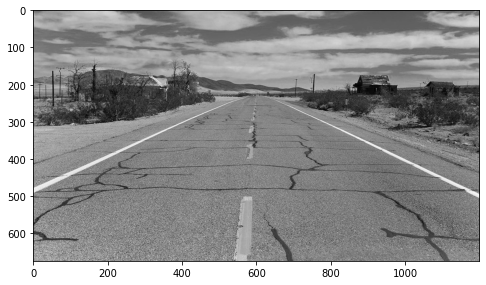

In [30]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray');

### Rotate the image clockwise 90 degrees [30 pts]

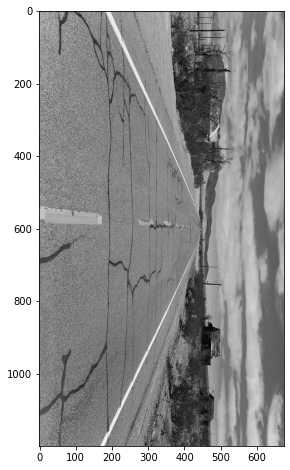

In [32]:
image_norm = cv2.rotate(img_gray, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image_norm, cmap='gray')

### Perform histogram equalization (or CLAHE) [30 pts]
(note: first rotate the image back, or use the original image for this and following tasks)

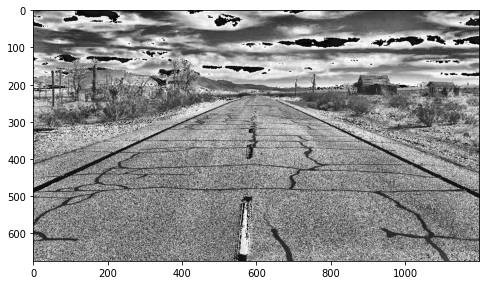

In [46]:
clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(img_gray) + 30
plt.imshow(final_img, cmap = 'gray');

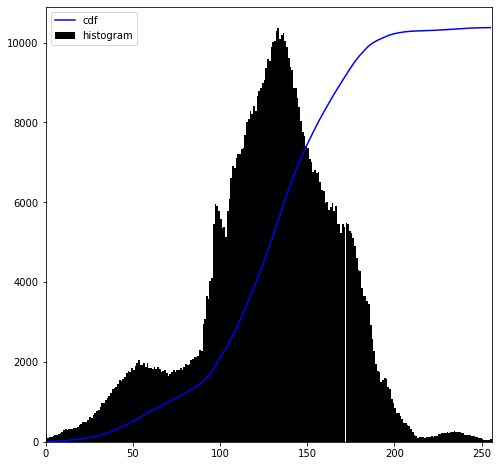

In [52]:
hist,bins = np.histogram(img_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(),256,[0,256], color = 'black')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Find edges using Canny edge detector [20pts]

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

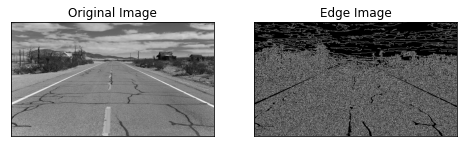

In [57]:
edges = cv2.Canny(final_img,100,200)
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

### (BONUS) Find the road [30pts]



+++++
i.e. find the sidelines of the road